<h1>Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
def sum_prod(X, V):
    if not X or not V:
        raise ValueError("Списки матриц и векторов не должны быть пустыми")

    n = X[0].shape[0]

    for i, (x, v) in enumerate(zip(X, V)):
        if x.shape != (n, n):
            raise ValueError(f"Матрица {i} имеет неверную размерность")
        if v.shape != (n, 1):
            raise ValueError(f"Вектор {i} имеет неверную размерность")

    result = np.zeros((n, 1))
    for x, v in zip(X, V):
        result += x @ v
    return result

test_cases = [
    (
        [np.array([[1, 2], [3, 4]])],
        [np.array([[1], [2]])],
        np.array([[5], [11]])
    ),
    (
        [np.eye(2), np.eye(2)*2],
        [np.array([[1], [0]]), np.array([[0], [1]])],
        np.array([[1], [2]])
    ),
    (
        [np.array([[1, 0], [0, 1]]), np.array([[2, 0], [0, 2]])],
        [np.array([[1], [1]]), np.array([[1], [1]])],
        np.array([[3], [3]])
    )
]

for i, (X, V, expected) in enumerate(test_cases, 1):
    try:
        result = sum_prod(X, V)
        if np.array_equal(result, expected):
            status = "OK"
        else:
            status = "FAIL"
        print(f"Test {i}: {status} (matrix size: {X[0].shape}, vectors: {len(V)}, expected: {expected.flatten()}, got: {result.flatten()})")
    except Exception as e:
        print(f"Test {i}: FAIL (error: {str(e)})")

error_tests = [
    ([], [], "empty"),
    ([np.eye(2)], [np.ones((3, 1))], "size mismatch")
]

for i, (X, V, case) in enumerate(error_tests, len(test_cases)+1):
    try:
        sum_prod(X, V)
        print(f"Test {i}: FAIL (error case '{case}' should raise exception)")
    except ValueError:
        print(f"Test {i}: OK (error case '{case}' handled correctly)")
    except Exception as e:
        print(f"Test {i}: FAIL (unexpected error: {str(e)})")

Test 1: OK (matrix size: (2, 2), vectors: 1, expected: [ 5 11], got: [ 5. 11.])
Test 2: OK (matrix size: (2, 2), vectors: 2, expected: [1 2], got: [1. 2.])
Test 3: OK (matrix size: (2, 2), vectors: 2, expected: [3 3], got: [3. 3.])
Test 4: OK (error case 'empty' handled correctly)
Test 5: OK (error case 'size mismatch' handled correctly)


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
def binarize(M, threshold=0.5):
    if M.size == 0:
        raise ValueError("Матрица не должна быть пустой")
    if not isinstance(threshold, (int, float)):
        raise TypeError("Порог должен быть числом")

    return (M >= threshold).astype(int)

test_cases = [
    (
        np.array([[0.1, 0.6], [0.4, 0.9]]),
        0.5,
        np.array([[0, 1], [0, 1]])
    ),
    (
        np.array([[0.1, 0.6], [0.4, 0.9]]),
        0.0,
        np.array([[1, 1], [1, 1]])
    ),
    (
        np.array([[1, 2], [3, 4]]),
        2.5,
        np.array([[0, 0], [1, 1]])
    ),
    (
        np.array([[0.5, 0.5]]),
        0.5,
        np.array([[1, 1]])
    )
]

print("Основные тесты:")
for i, (M, threshold, expected) in enumerate(test_cases, 1):
    try:
        result = binarize(M, threshold)
        if np.array_equal(result, expected):
            status = "OK"
        else:
            status = "FAIL"
        print(f"Test {i}: {status} (threshold: {threshold}, expected: {expected.flatten()}, got: {result.flatten()})")
    except Exception as e:
        print(f"Test {i}: FAIL (error: {str(e)})")

print("\nТест с threshold по умолчанию:")
default_test = np.array([[0.4, 0.6]])
result_default = binarize(default_test)
expected_default = np.array([[0, 1]])
print(f"Result: {'OK' if np.array_equal(result_default, expected_default) else 'FAIL'}",
      f"(expected: {expected_default.flatten()}, got: {result_default.flatten()})")

error_tests = [
    (np.array([]), 0.5, "empty matrix"),
    (np.array([[1, 2]]), "not_a_number", "invalid threshold type"),
    (np.array([[1, 2], [3, 4]]), None, "None threshold")
]

print("\nТесты на ошибки:")
for i, (M, threshold, description) in enumerate(error_tests, len(test_cases)+1):
    try:
        binarize(M, threshold)
        print(f"Test {i}: FAIL (case '{description}' should raise exception)")
    except ValueError as e:
        print(f"Test {i}: OK (ValueError caught for '{description}': {str(e)})")
    except TypeError as e:
        print(f"Test {i}: OK (TypeError caught for '{description}': {str(e)})")
    except Exception as e:
        print(f"Test {i}: FAIL (unexpected error for '{description}': {type(e).__name__}: {str(e)})")

Основные тесты:
Test 1: OK (threshold: 0.5, expected: [0 1 0 1], got: [0 1 0 1])
Test 2: OK (threshold: 0.0, expected: [1 1 1 1], got: [1 1 1 1])
Test 3: OK (threshold: 2.5, expected: [0 0 1 1], got: [0 0 1 1])
Test 4: OK (threshold: 0.5, expected: [1 1], got: [1 1])

Тест с threshold по умолчанию:
Result: OK (expected: [0 1], got: [0 1])

Тесты на ошибки:
Test 5: OK (ValueError caught for 'empty matrix': Матрица не должна быть пустой)
Test 6: OK (TypeError caught for 'invalid threshold type': Порог должен быть числом)
Test 7: OK (TypeError caught for 'None threshold': Порог должен быть числом)


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [ ]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in np.array(mat).T]

test_cases = [
    (
        np.array([[1, 2, 3], [4, 5, 5], [1, 1, 2], [3, 3, 3]]),
        [
            np.array([1, 2, 3]),
            np.array([4, 5]),
            np.array([1, 2]),
            np.array([3])
        ],
        [
            np.array([1, 3, 4]),
            np.array([1, 2, 5]),
            np.array([2, 3, 5])
        ]
    ),
    (
        np.array([[1]]),
        [np.array([1])],
        [np.array([1])]
    ),
    (
        np.array([[1, 1], [1, 1]]),
        [np.array([1]), np.array([1])],
        [np.array([1]), np.array([1])]
    ),
    (
        np.array([[1, 2], [3, 4]]),
        [np.array([1, 2]), np.array([3, 4])],
        [np.array([1, 3]), np.array([2, 4])]
    )
]

print("Основные тесты:")
for i, (mat, exp_rows, exp_cols) in enumerate(test_cases, 1):
    print(f"\nTest {i}: Matrix shape: {mat.shape}")

    row_results = unique_rows(mat)
    row_ok = all(np.array_equal(r, e) for r, e in zip(row_results, exp_rows))
    print(f"  Rows: {'OK' if row_ok else 'FAIL'}")
    for j, (res, exp) in enumerate(zip(row_results, exp_rows)):
        print(f"    Row {j}: got {res}, expected {exp}")

    col_results = unique_columns(mat)
    col_ok = all(np.array_equal(c, e) for c, e in zip(col_results, exp_cols))
    print(f"  Columns: {'OK' if col_ok else 'FAIL'}")
    for j, (res, exp) in enumerate(zip(col_results, exp_cols)):
        print(f"    Column {j}: got {res}, expected {exp}")

error_tests = [
    (np.array([]), "empty matrix"),
    ("not_a_matrix", "invalid input type"),
    ([[1, 2], [3]], "ragged array")
]

print("\nТесты на ошибки:")
for i, (mat, description) in enumerate(error_tests, len(test_cases)+1):
    try:
        unique_rows(mat)
        unique_columns(mat)
        print(f"Test {i}: FAIL (case '{description}' should raise exception)")
    except (ValueError, TypeError, AttributeError) as e:
        print(f"Test {i}: OK (caught {type(e).__name__} for '{description}': {str(e)})")
    except Exception as e:
        print(f"Test {i}: FAIL (unexpected error for '{description}': {type(e).__name__}: {str(e)})")

Основные тесты:

Test 1: Matrix shape: (4, 3)
  Rows: OK
    Row 0: got [1 2 3], expected [1 2 3]
    Row 1: got [4 5], expected [4 5]
    Row 2: got [1 2], expected [1 2]
    Row 3: got [3], expected [3]
  Columns: FAIL
    Column 0: got [1 3 4], expected [1 3 4]
    Column 1: got [1 2 3 5], expected [1 2 5]
    Column 2: got [2 3 5], expected [2 3 5]

Test 2: Matrix shape: (1, 1)
  Rows: OK
    Row 0: got [1], expected [1]
  Columns: OK
    Column 0: got [1], expected [1]

Test 3: Matrix shape: (2, 2)
  Rows: OK
    Row 0: got [1], expected [1]
    Row 1: got [1], expected [1]
  Columns: OK
    Column 0: got [1], expected [1]
    Column 1: got [1], expected [1]

Test 4: Matrix shape: (2, 2)
  Rows: OK
    Row 0: got [1 2], expected [1 2]
    Row 1: got [3 4], expected [3 4]
  Columns: OK
    Column 0: got [1 3], expected [1 3]
    Column 1: got [2 4], expected [2 4]

Тесты на ошибки:
Test 5: FAIL (case 'empty matrix' should raise exception)
Test 6: OK (caught TypeError for 'invalid i

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [ ]:
def analyze_normal_matrix(m, n, mean=0, std=1):
    matrix = np.random.normal(loc=mean, scale=std, size=(m, n))

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)

    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    plt.figure(figsize=(12, 8))
    plots = []

    plt.subplot(2, 1, 1)
    for i in range(min(m, 5)):
        plt.hist(matrix[i, :], alpha=0.5, label=f'Строка {i+1}')
    plt.title('Гистограммы значений по строкам')
    plt.legend()
    plots.append('row_histograms')

    plt.subplot(2, 1, 2)
    for j in range(min(n, 5)):
        plt.hist(matrix[:, j], alpha=0.5, label=f'Столбец {j+1}')
    plt.title('Гистограммы значений по столбцам')
    plt.legend()
    plots.append('col_histograms')

    plt.tight_layout()
    plt.show()

    result = {
        'matrix': matrix,
        'row_stats': {
            'means': row_means,
            'variances': row_vars
        },
        'col_stats': {
            'means': col_means,
            'variances': col_vars
        },
        'plots': plots
    }

    return result

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [ ]:
import numpy as np

def chess(m, n, a, b):
    if m <= 0:
        raise ValueError("m must be positive")
    if n <= 0:
        raise ValueError("n must be positive")

    # Создаем матрицу, где каждый элемент равен (i+j) % 2
    pattern = np.indices((m, n)).sum(axis=0) % 2
    # Заменяем 0 на a, 1 на b
    return np.where(pattern, b, a)

# Основные тесты
test_cases = [
    # (m, n, a, b, expected)
    (2, 2, 0, 1, np.array([[0, 1], [1, 0]])),
    (3, 3, 1, -1, np.array([[1, -1, 1], [-1, 1, -1], [1, -1, 1]])),
    (1, 5, 10, 20, np.array([[10, 20, 10, 20, 10]])),
    (4, 1, 7, 3, np.array([[7], [3], [7], [3]])),
    (3, 4, 'A', 'B', np.array([['A', 'B', 'A', 'B'],
                              ['B', 'A', 'B', 'A'],
                              ['A', 'B', 'A', 'B']], dtype='<U1')),
]

print("Основные тесты:")
for i, (m, n, a, b, expected) in enumerate(test_cases, 1):
    try:
        result = chess(m, n, a, b)
        if np.array_equal(result, expected):
            status = "OK"
        else:
            status = "FAIL"
        print(f"Test {i}: {status} (m={m}, n={n}, a={a}, b={b})")
        print(f"Result:\n{result}\n")
    except Exception as e:
        print(f"Test {i}: FAIL (unexpected error: {str(e)}")

# Тесты на ошибки
error_tests = [
    (0, 5, 1, 2, "m must be positive"),
    (5, 0, 1, 2, "n must be positive"),
    (-2, 3, 1, 2, "m must be positive"),
]

print("\nТесты на ошибки:")
for i, (m, n, a, b, expected_msg) in enumerate(error_tests, len(test_cases)+1):
    try:
        chess(m, n, a, b)
        print(f"Test {i}: FAIL (should raise ValueError for '{expected_msg}')")
    except ValueError as e:
        if str(e) == expected_msg:
            print(f"Test {i}: OK (correctly raised: '{str(e)}')")
        else:
            print(f"Test {i}: FAIL (wrong error message: '{str(e)}', expected '{expected_msg}')")
    except Exception as e:
        print(f"Test {i}: FAIL (unexpected {type(e).__name__}: '{str(e)}')")

Основные тесты:
Test 1: OK (m=2, n=2, a=0, b=1)
Result:
[[0 1]
 [1 0]]

Test 2: OK (m=3, n=3, a=1, b=-1)
Result:
[[ 1 -1  1]
 [-1  1 -1]
 [ 1 -1  1]]

Test 3: OK (m=1, n=5, a=10, b=20)
Result:
[[10 20 10 20 10]]

Test 4: OK (m=4, n=1, a=7, b=3)
Result:
[[7]
 [3]
 [7]
 [3]]

Test 5: OK (m=3, n=4, a=A, b=B)
Result:
[['A' 'B' 'A' 'B']
 ['B' 'A' 'B' 'A']
 ['A' 'B' 'A' 'B']]


Тесты на ошибки:
Test 6: OK (correctly raised: 'm must be positive')
Test 7: OK (correctly raised: 'n must be positive')
Test 8: OK (correctly raised: 'm must be positive')


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

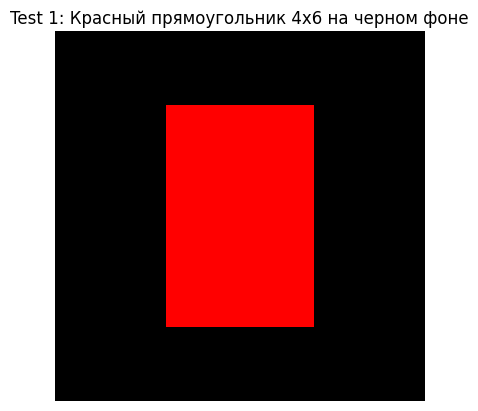

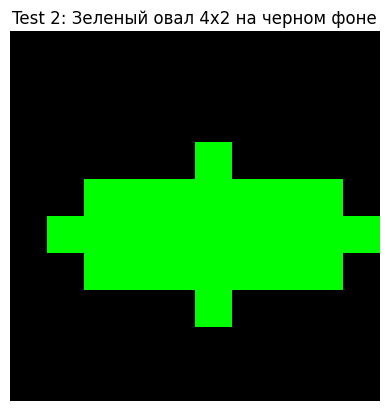

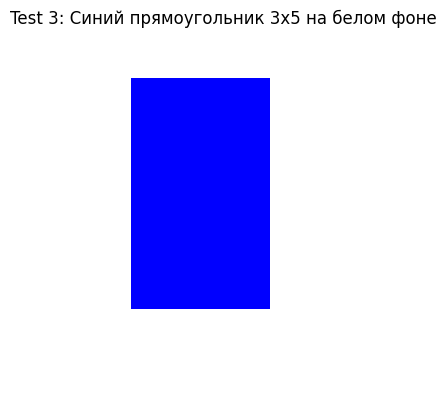

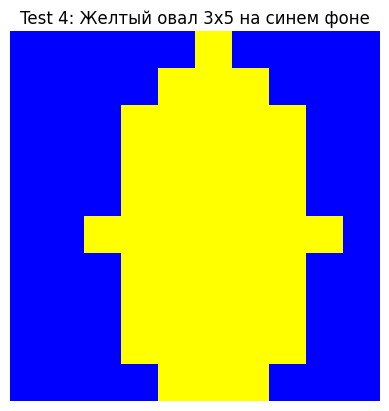

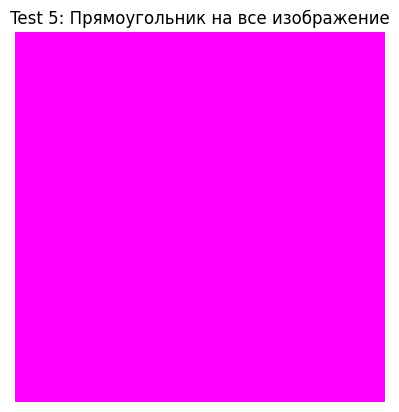

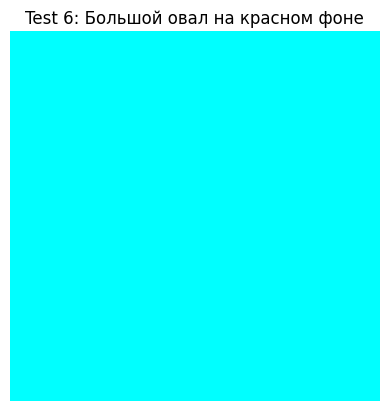

In [ ]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3))
    image[:, :] = background_color

    x_start = (n - a) // 2
    x_end = x_start + a
    y_start = (m - b) // 2
    y_end = y_start + b

    image[y_start:y_end, x_start:x_end] = rectangle_color

    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3))
    image[:, :] = background_color

    x0, y0 = n // 2, m // 2

    x = np.arange(n)
    y = np.arange(m)
    xx, yy = np.meshgrid(x, y)

    ellipse = ((xx - x0)**2 / a**2 + (yy - y0)**2 / b**2) <= 1

    image[ellipse] = ellipse_color

    return image

def visualize(image, title):
    plt.figure()
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def test_drawing_functions():
    # Тест 1: Прямоугольник 4x6 на изображении 10x10
    rect = draw_rectangle(4, 6, 10, 10, (255, 0, 0), (0, 0, 0))
    visualize(rect, "Test 1: Красный прямоугольник 4x6 на черном фоне")

    # Тест 2: Овал с полуосями 4 и 2 на изображении 10x10
    ellipse = draw_ellipse(4, 2, 10, 10, (0, 255, 0), (0, 0, 0))
    visualize(ellipse, "Test 2: Зеленый овал 4x2 на черном фоне")

    # Тест 3: Прямоугольник на белом фоне
    rect_white = draw_rectangle(3, 5, 8, 8, (0, 0, 255), (255, 255, 255))
    visualize(rect_white, "Test 3: Синий прямоугольник 3x5 на белом фоне")

    # Тест 4: Овал на синем фоне
    ellipse_blue = draw_ellipse(3, 5, 10, 10, (255, 255, 0), (0, 0, 255))
    visualize(ellipse_blue, "Test 4: Желтый овал 3x5 на синем фоне")

    # Тест 5: Прямоугольник, занимающий все изображение
    rect_full = draw_rectangle(10, 10, 10, 10, (255, 0, 255), (0, 0, 0))
    visualize(rect_full, "Test 5: Прямоугольник на все изображение")

    # Тест 6: Овал, почти занимающий все изображение
    ellipse_large = draw_ellipse(9, 9, 10, 10, (0, 255, 255), (255, 0, 0))
    visualize(ellipse_large, "Test 6: Большой овал на красном фоне")

if __name__ == "__main__":
    test_drawing_functions()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
import numpy as np

def analyze_time_series(series, window_size=3):
    series = np.array(series)
    results = {}

    results['mean'] = np.mean(series)

    results['variance'] = np.var(series)

    results['std_dev'] = np.std(series)

    diff = np.diff(series)
    maxima = []
    minima = []

    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            minima.append(i)

    results['local_maxima'] = np.array(maxima)
    results['local_minima'] = np.array(minima)

    if window_size % 2 == 0:
        window_size += 1

    pad_size = window_size // 2
    padded = np.pad(series, (pad_size, pad_size), mode='edge')
    moving_avg = np.convolve(padded, np.ones(window_size)/window_size, mode='valid')
    results['moving_avg'] = moving_avg

    return results

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
def one_hot_encoding(labels):
    labels = np.array(labels)
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((len(labels), num_classes))
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot